In [3]:
from keras import metrics
from model import neural_voice_judgment_model

model = neural_voice_judgment_model()
model.build((None, 128, 128, 1))
model.summary()
model.compile(optimizer='adam',loss="mean_squared_error", metrics=metrics.TopKCategoricalAccuracy(k = 5))


Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_3 (Sequential)   (None, 128, 128, 1)       0         
                                                                 
 conv2d_4 (Conv2D)           (None, 124, 124, 8)       208       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 62, 62, 8)        0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 58, 58, 16)        3216      
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 29, 29, 16)       0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (None, 25, 25, 100)      

In [4]:
import numpy as np
from sample_yomikomi import sample_all_data
from keras.callbacks import EarlyStopping
import idx2numpy
from os.path import join

input_output_label_data = idx2numpy.convert_from_file(join("..","dataset","train_label.idx"))
input_output_image_data = idx2numpy.convert_from_file(join("..","dataset","train_image.idx"))
callback = EarlyStopping(monitor="loss",patience=10)
fit_data = model.fit(x=input_output_image_data,y=input_output_label_data,epochs=500,callbacks=[callback])

Epoch 1/500
157/157 [==============================] - 100s 627ms/step - loss: 0.0929 - top_k_categorical_accuracy: 0.9586
Epoch 2/500
157/157 [==============================] - 102s 648ms/step - loss: 0.0912 - top_k_categorical_accuracy: 1.0000
Epoch 3/500
157/157 [==============================] - 92s 586ms/step - loss: 0.0912 - top_k_categorical_accuracy: 1.0000
Epoch 4/500
157/157 [==============================] - 99s 631ms/step - loss: 0.0912 - top_k_categorical_accuracy: 1.0000
Epoch 5/500
157/157 [==============================] - 98s 625ms/step - loss: 0.0912 - top_k_categorical_accuracy: 1.0000
Epoch 6/500
157/157 [==============================] - 97s 616ms/step - loss: 0.0912 - top_k_categorical_accuracy: 1.0000
Epoch 7/500
157/157 [==============================] - 111s 705ms/step - loss: 0.0912 - top_k_categorical_accuracy: 1.0000
Epoch 8/500
157/157 [==============================] - 104s 664ms/step - loss: 0.0912 - top_k_categorical_accuracy: 1.0000
Epoch 9/500
157/157 

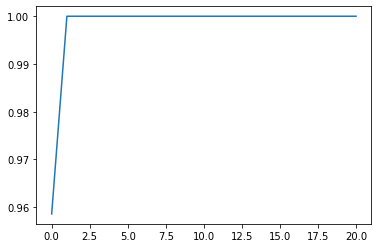

In [5]:
import matplotlib.pyplot as plt

y = fit_data.history["top_k_categorical_accuracy"]
x = list(range(len(y)))
plt.plot(x,y)

In [6]:
from keras.models import Model

test_label_data = idx2numpy.convert_from_file(join("..","dataset","test_label.idx"))
test_image_data = idx2numpy.convert_from_file(join("..","dataset","test_image.idx"))

In [7]:
model.evaluate(x=test_image_data,y=test_label_data)

32/32 [==============================] - 3s 85ms/step - loss: 0.0900 - top_k_categorical_accuracy: 1.0000


[0.0900227352976799, 1.0]

In [9]:
model.save(join("trained_model","first.tf"))

INFO:tensorflow:Assets written to: trained_model\first.tf\assets
